# JHU_COVID-19_Dataset(존스홉킨스대학 코로나19 데이터셋)
- 존스홉킨스대학의 Science and Engeneering 깃헙 COVID-19 페이지. https://github.com/CSSEGISandData/COVID-19


- csse_covid_19_daily_reports folder
- csse_covid_19_daily_reports_us folder
- csse_covid_19_time_series folder

### 1. 일일 데이터 활용
- csse_covid_19_daily_reports folder 활용 
- 국가,도시별 확진자/사망자/입원중/완치자 등의 수를 나타낸 데이터
- 01-22-2020.csv ~ 07-18-2020.csv 중에서 05-30-2020.csv 데이터 활용


In [ ]:
# 5/30날짜 기반, COVID-19 데이터 url
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-18-2020.csv"

In [ ]:
# 데이터 불러오기
import pandas as pd 
df = pd.read_csv(url, encoding='utf-8')
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-19 04:34:58,34.223334,-82.461707,185,2,0,183.0,"Abbeville, South Carolina, US",754.270804,1.081081
1,22001.0,Acadia,Louisiana,US,2020-07-19 04:34:58,30.295065,-92.414197,1610,48,0,1562.0,"Acadia, Louisiana, US",2594.890805,2.981366
2,51001.0,Accomack,Virginia,US,2020-07-19 04:34:58,37.767072,-75.632346,1051,15,0,1036.0,"Accomack, Virginia, US",3252.258943,1.427212
3,16001.0,Ada,Idaho,US,2020-07-19 04:34:58,43.452658,-116.241552,5723,32,0,5691.0,"Ada, Idaho, US",1188.362643,0.559147
4,19001.0,Adair,Iowa,US,2020-07-19 04:34:58,41.330756,-94.471059,20,0,0,20.0,"Adair, Iowa, US",279.642058,0.000000


In [ ]:
# 결측치 확인
df.isnull().sum()

FIPS                   695
Admin2                 690
Province_State         168
Country_Region           0
Last_Update              0
Lat                     77
Long_                   77
Confirmed                0
Deaths                   0
Recovered                0
Active                   2
Combined_Key             0
Incidence_Rate          77
Case-Fatality_Ratio     50
dtype: int64

In [ ]:
df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

### 주요 컬럼 내용
- Country_Region : 국가
- Province_State : 도시
- Confirmed      : 확진자 수
- Deaths         : 사망자 수
- Recovered      : 회복환자 수
- Active         : 치료중 환자 수

In [ ]:
# 국가별 groupby, 확진자/사망자/입원환자/완치자 컬럼 구성된 dataFrame 
df.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Active', 'Recovered'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Confirmed,Deaths,Active,Recovered
Country_Region,,,,
Afghanistan,35301,1164,10864.0,23273
Albania,4008,111,1633.0,2264
Algeria,22549,1068,5737.0,15744
Andorra,880,52,25.0,803
Angola,687,29,448.0,210
...,...,...,...,...
West Bank and Gaza,8204,59,6549.0,1596
Western Sahara,10,1,1.0,8
Yemen,1581,443,437.0,701


In [ ]:
# groupby dataFrame 객체 생성
df_country = df.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Active', 'Recovered'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
df_country.head()

,Confirmed,Deaths,Active,Recovered
Country_Region,,,,
Afghanistan,35301,1164,10864.0,23273
Albania,4008,111,1633.0,2264
Algeria,22549,1068,5737.0,15744
Andorra,880,52,25.0,803
Angola,687,29,448.0,210


In [ ]:
# Confirmed 순서로 정렬
df_country.sort_values(by='Confirmed', ascending=False) # False-> 큰수에서 작은순서

,Confirmed,Deaths,Active,Recovered
Country_Region,,,,
US,3711413,140119,2491916.0,1122720
Brazil,2074860,78772,548680.0,1447408
India,1077781,26816,373542.0,677423
Russia,764215,12228,206078.0,545909
South Africa,350879,4948,163701.0,182230
...,...,...,...,...
Saint Kitts and Nevis,17,0,2.0,15
Papua New Guinea,16,0,8.0,8
Holy See,12,0,0.0,12


In [ ]:
# 확진자수 기준 dataFrame 생성
df_confirmed = df_country.sort_values(by='Confirmed', ascending=False)

In [ ]:
# 확진자 기준 국가별 랭크 (10개국가)
df_confirmed_10 = df_confirmed[:10]
df_confirmed_10

,Confirmed,Deaths,Active,Recovered
Country_Region,,,,
US,3711413,140119,2491916.0,1122720
Brazil,2074860,78772,548680.0,1447408
India,1077781,26816,373542.0,677423
Russia,764215,12228,206078.0,545909
South Africa,350879,4948,163701.0,182230
Peru,349500,12998,98416.0,238086
Mexico,338913,38888,28786.0,271239
Chile,328846,8445,20952.0,299449
United Kingdom,295632,45358,248861.0,1413


In [ ]:
# 그밖에 11~20위권 
df_confirmed_20 = df_confirmed[10:20]
df_confirmed_20

,Confirmed,Deaths,Active,Recovered
Country_Region,,,,
Pakistan,263496,5568,53652.0,204276
Spain,260255,28420,81459.0,150376
Saudi Arabia,248416,2447,51751.0,194218
Italy,244216,35042,12368.0,196806
Turkey,218717,5475,12229.0,201013
France,211943,30155,102417.0,79371
Germany,202426,9091,6135.0,187200
Bangladesh,202066,2581,89387.0,110098
Colombia,190700,6516,98348.0,85836


In [ ]:
# 시각화 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina' # 그래프의 글자 선명하게
!apt -qq -y install fonts-nanum  # 나눔 글자체 설치
#나눔고딕 글자체의 전체 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#글자체의 경로와 글자 크기 설정
font = fm.FontProperties(fname=fontpath, size=9)
#폰트 이름 설정
plt.rc('font', family='NanumBarunGothic') 
#폰트 업데이트
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


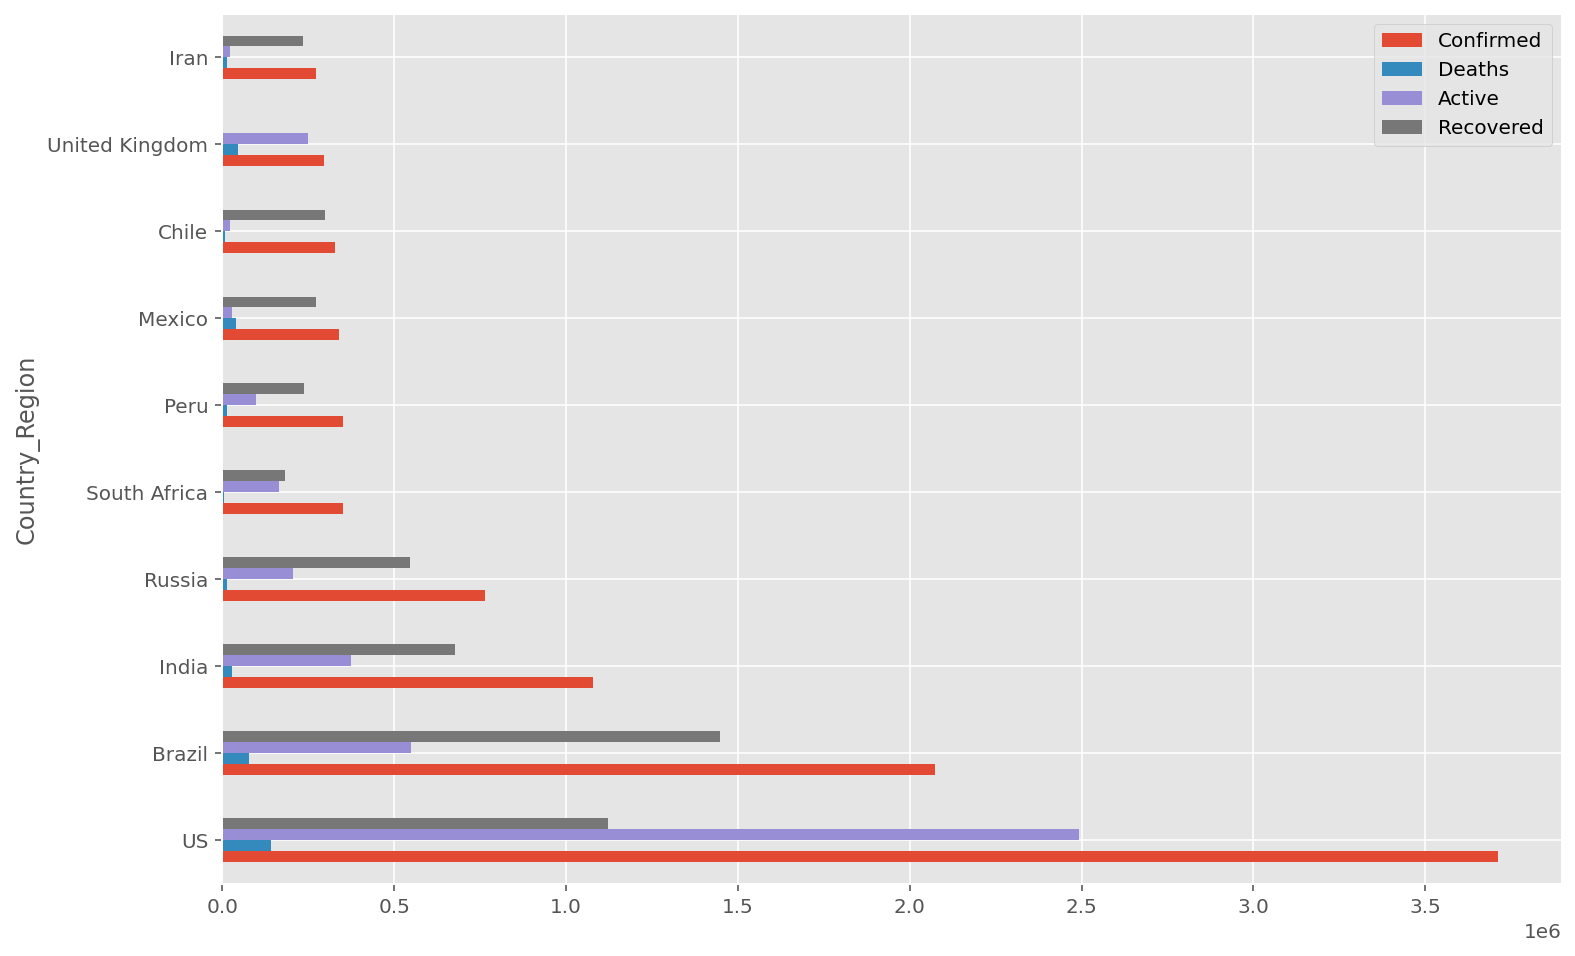

In [ ]:
# 시각화
plt.style.use('ggplot')
df_confirmed_10.plot(kind='barh', figsize=(12, 8), grid=True)
#plt.savefig('./country_patient.png') 시각화 저장
plt.savefig('JHU_world.png', dpi=300)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


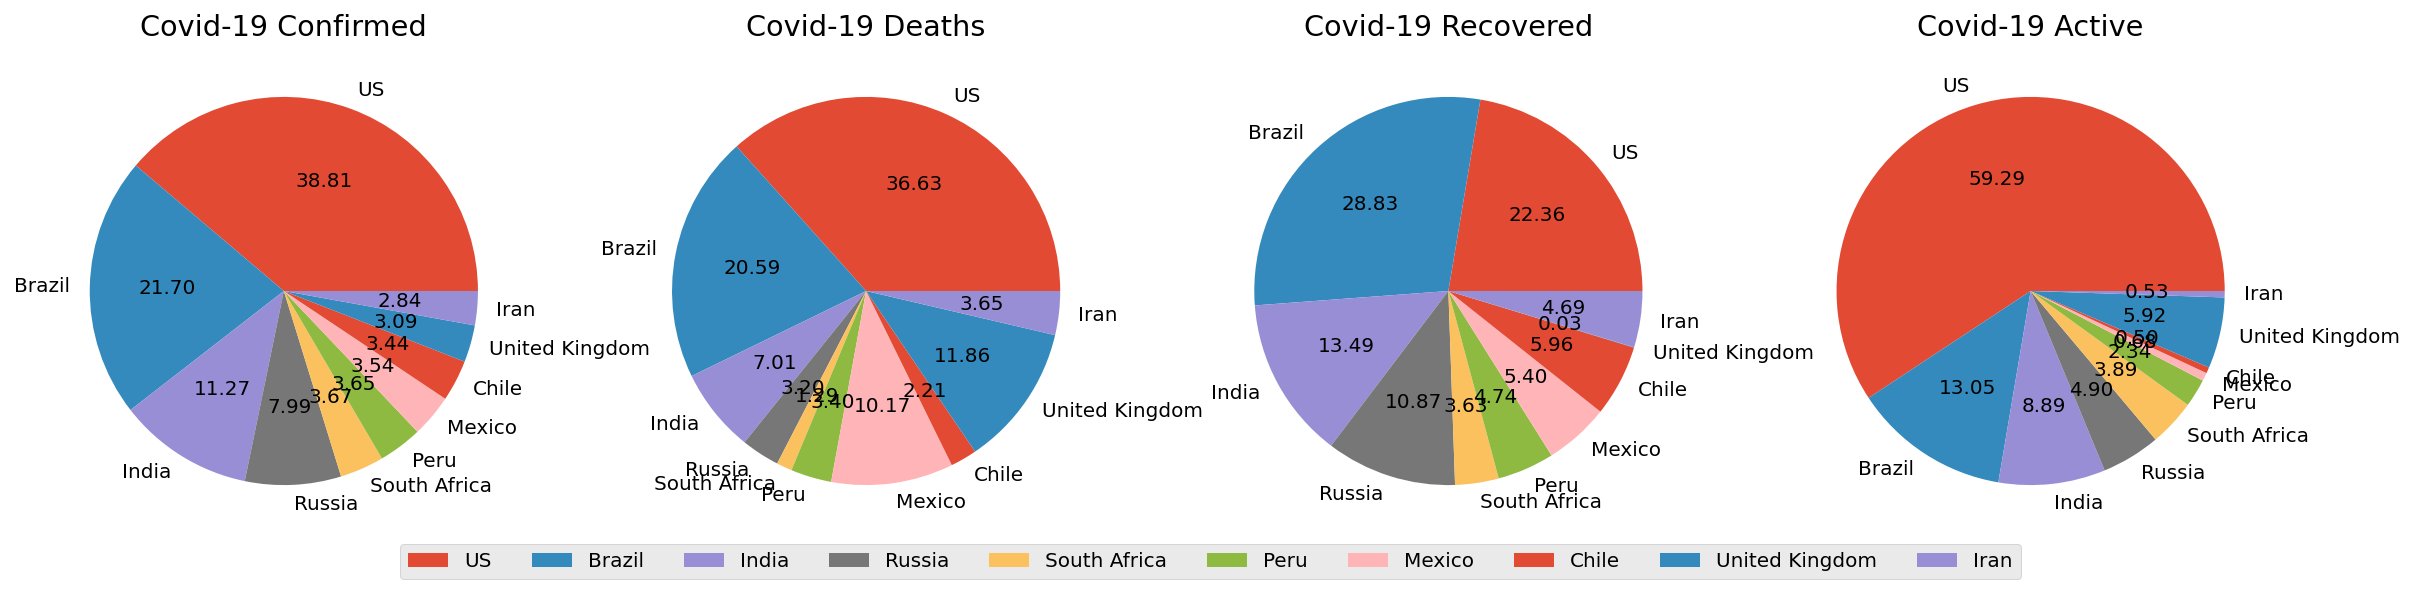

In [ ]:
# 파이차트 시각화
plt.style.use('ggplot')
ax = plt.figure(figsize=(20,10))
ax.add_subplot(1, 4, 1)
plt.title('Covid-19 Confirmed') 
plt.pie(df_confirmed_10['Confirmed'], labels=df_confirmed_10.index, autopct='%1.2f') # 확진자 10위 국가에 관한 파이차트

ax.add_subplot(1, 4, 2)
plt.title('Covid-19 Deaths')
plt.pie(df_confirmed_10['Deaths'], labels=df_confirmed_10.index, autopct='%1.2f') # 사망자 10위 국가에 관한 파이차트

ax.add_subplot(1, 4, 3)
plt.title('Covid-19 Recovered')
plt.pie(df_confirmed_10['Recovered'], labels=df_confirmed_10.index, autopct='%1.2f') # 회복환자 10위 국가에 관한 파이차트

ax.add_subplot(1, 4, 4)
plt.title('Covid-19 Active')
plt.pie(df_confirmed_10['Active'], labels=df_confirmed_10.index, autopct='%1.2f') # 치료중인 환자 파이차트
plt.legend(df_confirmed_10.index, loc='bottom', ncol=10, bbox_to_anchor=(0.5,0), fontsize=10)
plt.savefig('covid19_piechart.png', dpi=300)

### - 잘보이지않는 컬럼 시각화 (사망자)

In [ ]:
# 기존 df_country 데이터프레임 사망자 수 기준 정렬
df_country.sort_values(by='Deaths', ascending=False)

,Confirmed,Deaths,Active,Recovered
Country_Region,,,,
US,3711413,140119,2491916.0,1122720
Brazil,2074860,78772,548680.0,1447408
United Kingdom,295632,45358,248861.0,1413
Mexico,338913,38888,28786.0,271239
Italy,244216,35042,12368.0,196806
...,...,...,...,...
Saint Vincent and the Grenadines,38,0,9.0,29
Saint Lucia,23,0,4.0,19
Saint Kitts and Nevis,17,0,2.0,15


In [ ]:
# 사망자 컬럼만 확인
df_death = df_country.sort_values(by='Deaths', ascending=False)
df_death['Deaths']

Country_Region
US                                  140119
Brazil                               78772
United Kingdom                       45358
Mexico                               38888
Italy                                35042
                                     ...  
Saint Vincent and the Grenadines         0
Saint Lucia                              0
Saint Kitts and Nevis                    0
Bhutan                                   0
Mongolia                                 0
Name: Deaths, Length: 188, dtype: int64

In [ ]:
# 사망자 컬럼만
df_death_sort = df_death['Deaths']

# 사망자 주요 10개국가 
df_death_10 = df_death_sort[:10]

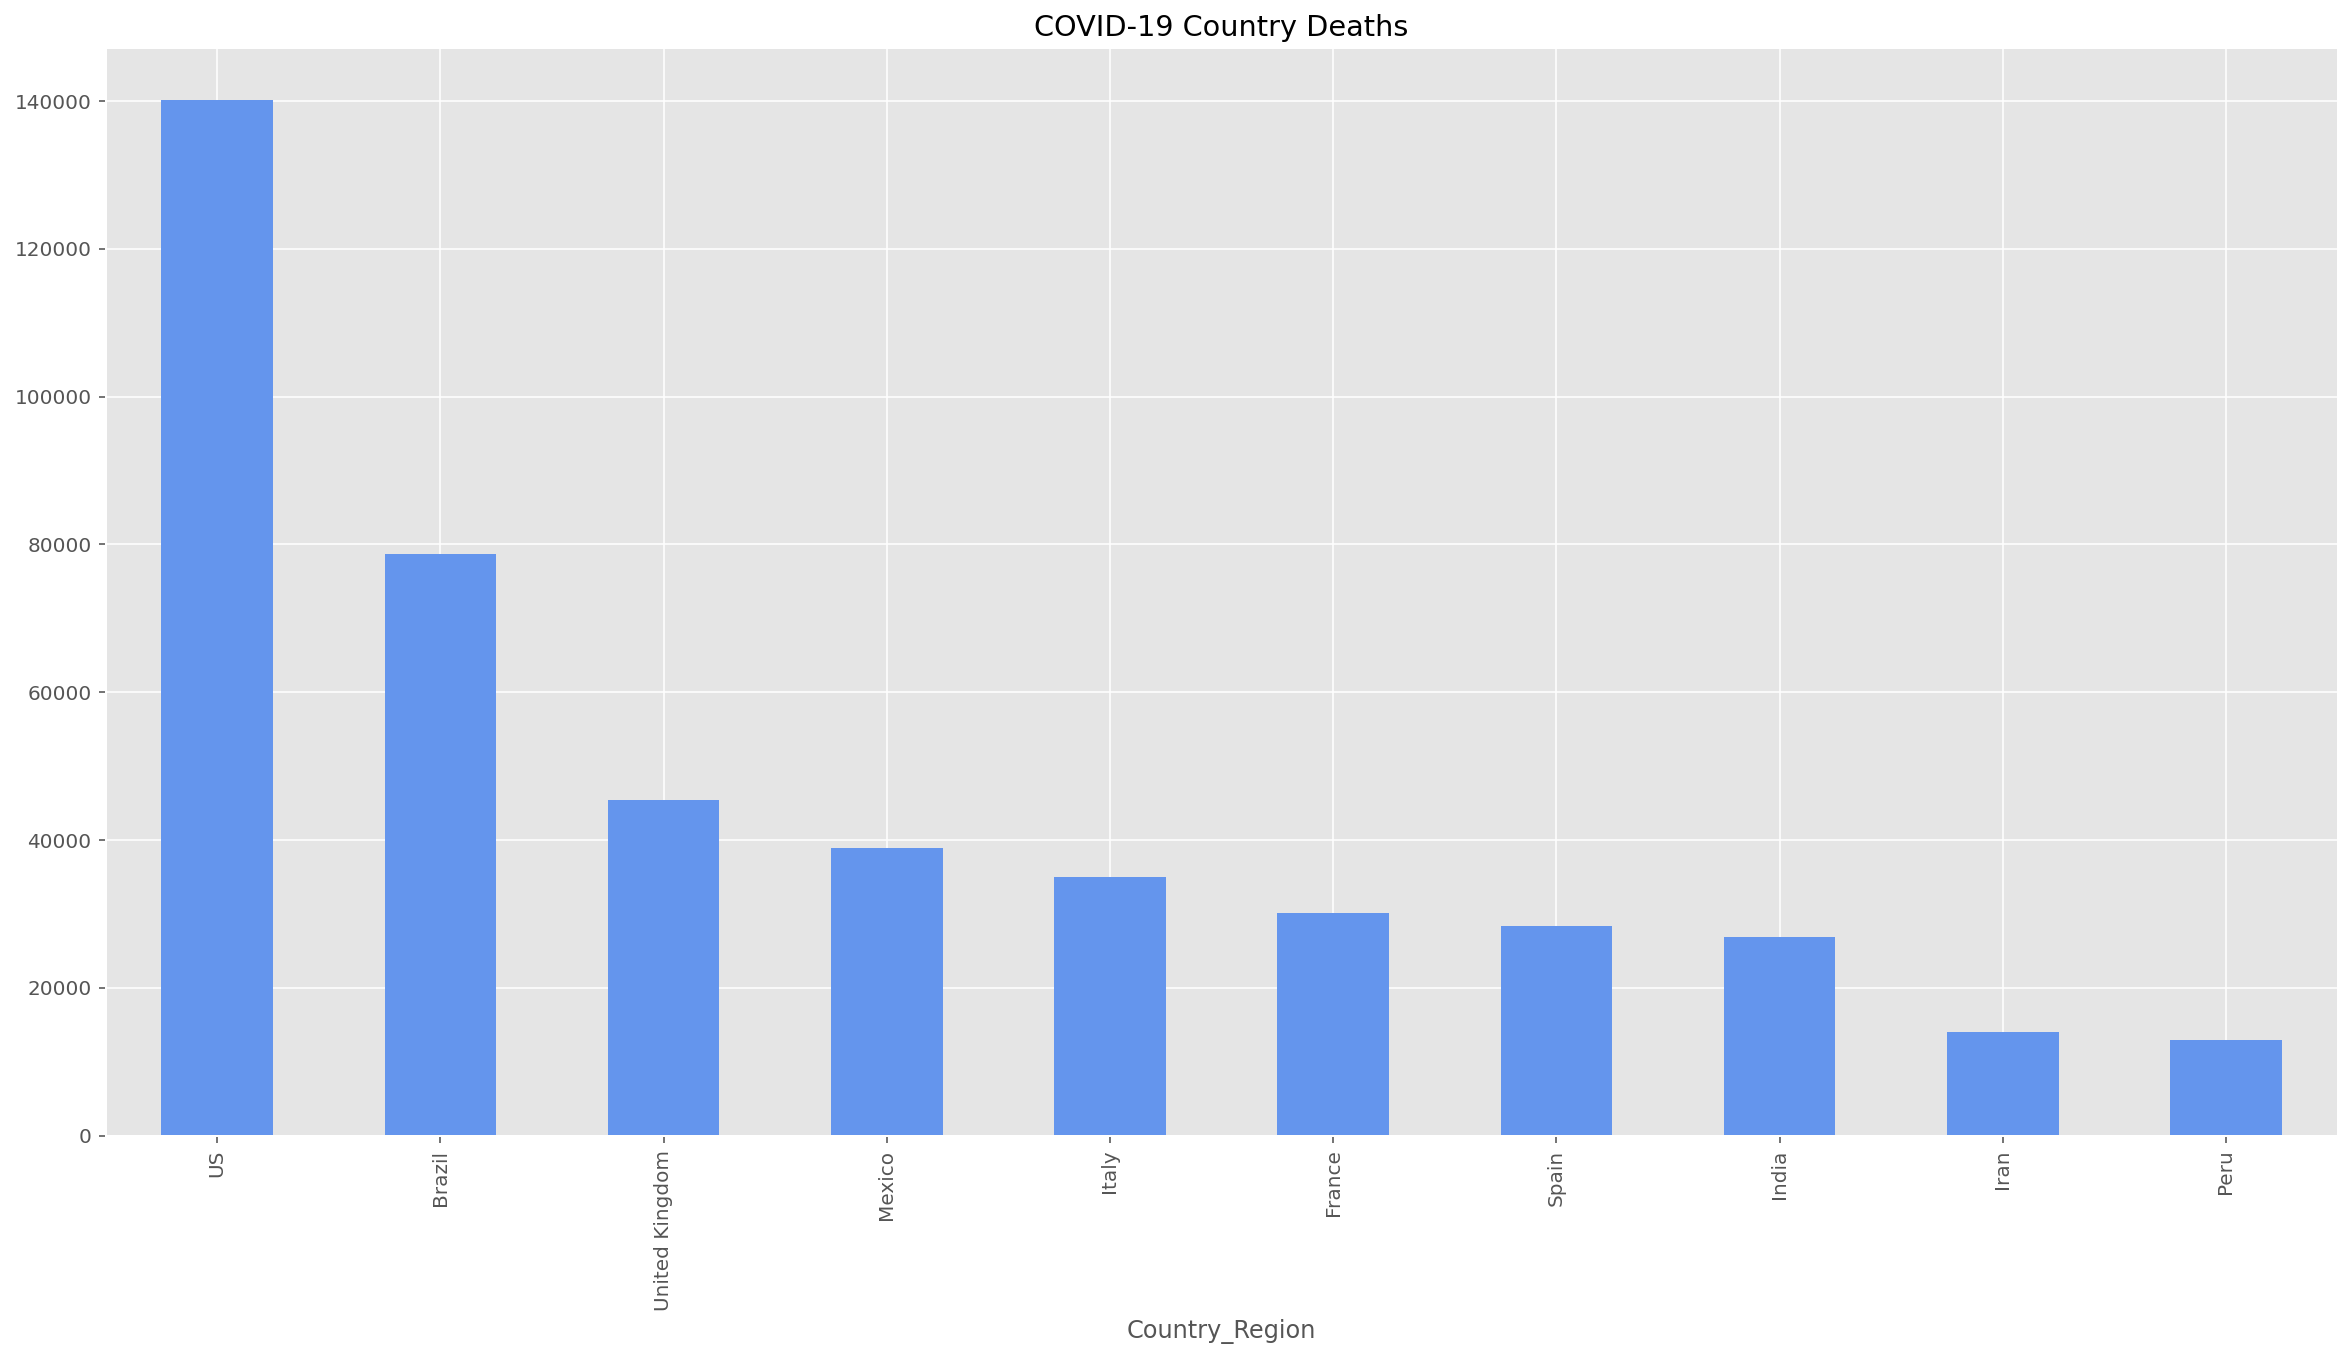

In [ ]:
# 사망자 시각화
plt.figure(figsize=(20,10))
plt.title("COVID-19 Country Deaths")
df_death_10.plot.bar(color='cornflowerblue')
plt.savefig('JHU_death.png', dpi=300)

### 2. 시계열 데이터 

국가별 확진자/사망자/완치자의 수를 시계열로 기록
- time_series_19-covid-Confirmed.csv
- time_series_19-covid-Deaths.csv
- time_series_19-covid-Recovered.csv

In [ ]:
# 데이터 링크
time_series_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

# 확진자/사망자/완치자
confirmed_url = time_series_url + "time_series_covid19_confirmed_global.csv"
death_url = time_series_url + 'time_series_covid19_deaths_global.csv'
recover_url = time_series_url + 'time_series_covid19_recovered_global.csv'

In [ ]:
# 확진자 데이터
pd.read_csv(confirmed_url, encoding='utf-8')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880,880,884,884,889
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687,705,749,779,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,659,661,662,671,683,688,693,698,698,702,707,710,711,712,713,713,713,714,715,717,719,719,720,721,724,724,726,727,727,729,732,732,737,740,741,743,746,746,746,747
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,705,728,844,885,902,909,919,922,941,967,992,1015,1076,1089,1103,1118,1128,1158,1190,1221,1240,1248,1265,1284,1297,1318,1356,1380,1389,1465,1498,1516,1526,1552,1576,1581,1606,1619,1629,1640
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,176,176,176,197,197,210,210,247,247,247,265,265,272,272,272,272,272,303,303,303,309,309,311,311,311,313,314,314,317,317,317,321,321,328,328,328,334,334,337,337
264,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4971,5035,5097,5160,5221,5279,5338,5399,5457,5513,5567,5630,5691,5747,5799,5849,5900,5900,6005,6058,6058,6159,6213,6262,6315,6364,6410,6457,6506,6552,6596,6643,6695,6741,6786,6834,6878,6921,6967,7015


In [ ]:
# 확진자 시계열데이터 dataFrame
con_df = pd.read_csv(confirmed_url, encoding='utf-8') 

In [ ]:
# 날짜 확인
con_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/13/20', '7/14/20', '7/15/20', '7/16/20', '7/17/20', '7/18/20',
       '7/19/20', '7/20/20', '7/21/20', '7/22/20'],
      dtype='object', length=187)

In [ ]:
# 특정 컬럼만 가져오기: 국가별 + 시계열데이터
# con_col_df = con_df.groupby(['Country/Region'])[con_df.columns[:-50]].sum() # 5월 말까지 뽑기위해 인덱싱 -50
con_col_df = con_df.groupby(['Country/Region'])[con_df.columns].sum()
con_col_df.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880,880,884,884,889
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687,705,749,779,812


In [ ]:
# 위도,경도 컬럼 삭제
con_col_df.drop(['Lat','Long'], axis=1, inplace=True)

In [ ]:
con_col_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Afghanistan to Zimbabwe
Columns: 183 entries, 1/22/20 to 7/22/20
dtypes: int64(183)
memory usage: 270.2+ KB


In [ ]:
con_col_df.columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/13/20', '7/14/20', '7/15/20', '7/16/20', '7/17/20', '7/18/20',
       '7/19/20', '7/20/20', '7/21/20', '7/22/20'],
      dtype='object', length=183)

In [ ]:
# Country 인덱스로 특정국가 조회
con_col_df[con_col_df.index == 'US']

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,16,16,24,30,...,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255328,2281767,2312303,2347491,2382426,2422299,2467554,2510259,2549864,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3185737,3245925,3304942,3364157,3431574,3498902,3576157,3647715,3711413,3773260,3834677,3899211,3970085


In [ ]:
# 주요 5개국 조회
con_col_df.loc[['US','United Kingdom','Russia','Brazil','Spain']]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,16,16,24,30,...,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255328,2281767,2312303,2347491,2382426,2422299,2467554,2510259,2549864,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3185737,3245925,3304942,3364157,3431574,3498902,3576157,3647715,3711413,3773260,3834677,3899211,3970085
United Kingdom,0,0,0,0,0,0,0,0,0,2,2,2,8,8,9,9,9,13,14,14,15,16,17,18,18,18,19,19,20,22,23,23,28,30,34,37,44,56,61,94,...,272050,272857,273888,274971,275970,276990,277974,278640,279264,280156,281038,281815,282512,283151,283785,284192,284812,285216,285279,285285,285787,286412,286931,287290,287874,288511,289154,289678,290504,291154,291691,292931,293469,294116,294803,295632,296358,296944,297389,297952
Russia,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,519458,528267,536484,544725,552549,560321,568292,576162,583879,591465,598878,606043,613148,619936,626779,633563,640246,646929,653479,660231,666941,673564,680283,686852,693215,699749,706240,712863,719449,726036,732547,738787,745197,751612,758001,764215,770311,776212,782040,787890
Brazil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,...,850514,867624,888271,923189,955377,978142,1032913,1067579,1083341,1106470,1145906,1188631,1228114,1274974,1313667,1344143,1368195,1402041,1448753,1496858,1539081,1577004,1603055,1623284,1668589,1713160,1755779,1800827,1839850,1864681,1884967,1926824,1966748,2012151,2046328,2074860,2098389,2118646,2159654,2227514
Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,...,243605,243928,244109,244328,244683,245268,245575,245938,246272,246504,246752,247086,247486,247905,248469,248770,248970,249271,249659,250103,250545,250545,250545,251789,252130,252513,253056,253908,253908,253908,255953,256619,257494,258855,260255,260255,260255,264836,266194,267551


In [ ]:
# 한국 region 명을 알고자 인덱스의 contains 조건문으로 조회
con_col_df.index[con_col_df.index.str.contains('Korea|Republic')]  #Korea 또는 Republic으로 조회

Index(['Central African Republic', 'Dominican Republic', 'Korea, South'], dtype='object', name='Country/Region')

In [ ]:
# 위 그래프의 확진자 주요 5개국과 한국 데이터프레임 생성
fix_df = con_col_df.loc[['US','United Kingdom','Russia','Brazil','Spain','Korea, South']]

In [ ]:
fix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, US to Korea, South
Columns: 183 entries, 1/22/20 to 7/22/20
dtypes: int64(183)
memory usage: 8.6+ KB


In [ ]:
# 국가별 정책날짜와 확진자 날짜 시각화를 위한, 날짜 컬럼을 datetime으로 바꿔야함 중요!
fix_df.columns = pd.to_datetime(fix_df.columns, format='%m/%d/%y')  # to_datetime()의 format= 을 통해 변환가능!

In [ ]:
# 컬럼 datetime으로 변환 했는지 확인!
fix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, US to Korea, South
Columns: 183 entries, 2020-01-22 to 2020-07-22
dtypes: int64(183)
memory usage: 8.6+ KB


In [ ]:
fix_df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,16,16,24,30,...,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255328,2281767,2312303,2347491,2382426,2422299,2467554,2510259,2549864,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3185737,3245925,3304942,3364157,3431574,3498902,3576157,3647715,3711413,3773260,3834677,3899211,3970085
United Kingdom,0,0,0,0,0,0,0,0,0,2,2,2,8,8,9,9,9,13,14,14,15,16,17,18,18,18,19,19,20,22,23,23,28,30,34,37,44,56,61,94,...,272050,272857,273888,274971,275970,276990,277974,278640,279264,280156,281038,281815,282512,283151,283785,284192,284812,285216,285279,285285,285787,286412,286931,287290,287874,288511,289154,289678,290504,291154,291691,292931,293469,294116,294803,295632,296358,296944,297389,297952
Russia,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,519458,528267,536484,544725,552549,560321,568292,576162,583879,591465,598878,606043,613148,619936,626779,633563,640246,646929,653479,660231,666941,673564,680283,686852,693215,699749,706240,712863,719449,726036,732547,738787,745197,751612,758001,764215,770311,776212,782040,787890
Brazil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,...,850514,867624,888271,923189,955377,978142,1032913,1067579,1083341,1106470,1145906,1188631,1228114,1274974,1313667,1344143,1368195,1402041,1448753,1496858,1539081,1577004,1603055,1623284,1668589,1713160,1755779,1800827,1839850,1864681,1884967,1926824,1966748,2012151,2046328,2074860,2098389,2118646,2159654,2227514
Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,...,243605,243928,244109,244328,244683,245268,245575,245938,246272,246504,246752,247086,247486,247905,248469,248770,248970,249271,249659,250103,250545,250545,250545,251789,252130,252513,253056,253908,253908,253908,255953,256619,257494,258855,260255,260255,260255,264836,266194,267551
"Korea, South",1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,...,12085,12121,12155,12198,12257,12306,12373,12421,12438,12484,12535,12563,12602,12653,12715,12757,12800,12850,12904,12967,13030,13091,13137,13181,13244,13293,13338,13373,13417,13479,13512,13551,13612,13672,13711,13745,13771,13816,13879,13938


In [ ]:
# 국가별 데이터프레임 생성 (국가마다 시각화를위해)
# df_us = pd.DataFrame({'date':fix_df.columns, 'confirmed':fix_df.loc['US']}) 이렇게 할필요없이..

df_us = pd.DataFrame({'confirmed':fix_df.loc['US']}) # loc으로 가져오면 해당 데이터값의 인덱싱 정보도 가지고옴.

In [ ]:
df_us

,confirmed
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
...,...
2020-07-18,3711413
2020-07-19,3773260
2020-07-20,3834677
2020-07-21,3899211


In [ ]:
# 날짜 인덱싱 삭제
df_us.reset_index(inplace=True)

In [ ]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      183 non-null    datetime64[ns]
 1   confirmed  183 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [ ]:
df_us

,index,confirmed
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
...,...,...
178,2020-07-18,3711413
179,2020-07-19,3773260
180,2020-07-20,3834677
181,2020-07-21,3899211


In [ ]:
# 미국 확진자수를 values로 가져와보기 (실험)
# us_val = fix_df.loc['US'].values

In [ ]:
# df_us = pd.DataFrame({'confirmed':us_val})

In [ ]:
# values로 가져올때는 딱 값만 가져온다.
# df_us

In [ ]:
fix_df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,16,16,24,30,...,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255328,2281767,2312303,2347491,2382426,2422299,2467554,2510259,2549864,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3185737,3245925,3304942,3364157,3431574,3498902,3576157,3647715,3711413,3773260,3834677,3899211,3970085
United Kingdom,0,0,0,0,0,0,0,0,0,2,2,2,8,8,9,9,9,13,14,14,15,16,17,18,18,18,19,19,20,22,23,23,28,30,34,37,44,56,61,94,...,272050,272857,273888,274971,275970,276990,277974,278640,279264,280156,281038,281815,282512,283151,283785,284192,284812,285216,285279,285285,285787,286412,286931,287290,287874,288511,289154,289678,290504,291154,291691,292931,293469,294116,294803,295632,296358,296944,297389,297952
Russia,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,519458,528267,536484,544725,552549,560321,568292,576162,583879,591465,598878,606043,613148,619936,626779,633563,640246,646929,653479,660231,666941,673564,680283,686852,693215,699749,706240,712863,719449,726036,732547,738787,745197,751612,758001,764215,770311,776212,782040,787890
Brazil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,...,850514,867624,888271,923189,955377,978142,1032913,1067579,1083341,1106470,1145906,1188631,1228114,1274974,1313667,1344143,1368195,1402041,1448753,1496858,1539081,1577004,1603055,1623284,1668589,1713160,1755779,1800827,1839850,1864681,1884967,1926824,1966748,2012151,2046328,2074860,2098389,2118646,2159654,2227514
Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,...,243605,243928,244109,244328,244683,245268,245575,245938,246272,246504,246752,247086,247486,247905,248469,248770,248970,249271,249659,250103,250545,250545,250545,251789,252130,252513,253056,253908,253908,253908,255953,256619,257494,258855,260255,260255,260255,264836,266194,267551
"Korea, South",1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,...,12085,12121,12155,12198,12257,12306,12373,12421,12438,12484,12535,12563,12602,12653,12715,12757,12800,12850,12904,12967,13030,13091,13137,13181,13244,13293,13338,13373,13417,13479,13512,13551,13612,13672,13711,13745,13771,13816,13879,13938


In [ ]:
# 나머지 국가 데이터프레임 생성
df_uk = pd.DataFrame({'confirmed':fix_df.loc['United Kingdom']})
df_ru = pd.DataFrame({'confirmed':fix_df.loc['Russia']})
df_bz = pd.DataFrame({'confirmed':fix_df.loc['Brazil']})
df_es = pd.DataFrame({'confirmed':fix_df.loc['Spain']})
df_kr = pd.DataFrame({'confirmed':fix_df.loc['Korea, South']})

# 국가들 인덱싱 삭제
df_uk.reset_index(inplace=True)
df_ru.reset_index(inplace=True)
df_bz.reset_index(inplace=True)
df_es.reset_index(inplace=True)
df_kr.reset_index(inplace=True)

In [ ]:
df_uk.head()

,index,confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [ ]:
df_uk['index']

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
178   2020-07-18
179   2020-07-19
180   2020-07-20
181   2020-07-21
182   2020-07-22
Name: index, Length: 183, dtype: datetime64[ns]

In [ ]:
# 시각화 y축 설정을 위한 값 봐보기
df_us['confirmed'].sum()

203491413

In [ ]:
#그래프의 y축 설정 값에 따른 값봐보기  0~1800000, 200000 씩 
list(range(0, df_us["confirmed"].max()+200000, 200000))  

[0,
 200000,
 400000,
 600000,
 800000,
 1000000,
 1200000,
 1400000,
 1600000,
 1800000,
 2000000,
 2200000,
 2400000,
 2600000,
 2800000,
 3000000,
 3200000,
 3400000,
 3600000,
 3800000,
 4000000]

In [ ]:
df_us['index']

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
178   2020-07-18
179   2020-07-19
180   2020-07-20
181   2020-07-21
182   2020-07-22
Name: index, Length: 183, dtype: datetime64[ns]

In [ ]:
# 국가 정책마다 날짜 시각화를 위한 func 정의
import numpy as np 
from datetime import datetime 
from matplotlib import ticker
from matplotlib.dates import DateFormatter

def Con_plot(na):
  fig, ax = plt.subplots(figsize=(15,8))
  plt.title(na + ' Confirmed Timeseries Graph', fontsize=20)
  break_lst = [] # 휴교령 정책 날짜 리스트
  social_lst = [] # 사회적거리두기 정책 날짜

  if (na == 'US'):
    # 그래프의 축설정
    plt.setp(
        ax,
        xticks = df_us['index'], # x축 날짜값
        xticklabels = df_us['index'], # x축출력할 문자열
        yticks = range(0, df_us['confirmed'].max()+200000,200000))
    
    ax.tick_params('x', labelrotation=90) # x축 label 90도
    date_format = DateFormatter("%Y/%m/%d") # x축 출력형식을 설정(년/월/일)
    ax.xaxis.set_major_formatter(date_format) # y축 설정
    number_format = ticker.FormatStrFormatter("%8d") # y축 숫자
    ax.yaxis.set_major_formatter(number_format) # y축 설정
    ax.stackplot(df_us['index'], df_us['confirmed'])
    plt.legend(['confirmed'])

    datelist = [
            '2020-03-12',
            '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
            '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
            '2020-03-21', '2020-03-23', '2020-03-24', '2020-03-25',
            '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
            '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
            '2020-04-03']
    social_day = '2020-04-01'
    break_lst = [datetime.strptime(date, '%Y-%m-%d') for date in datelist] # datelist datetime 형식으로 변환
    social_us = datetime.strptime(social_day, '%Y-%m-%d')

    for i, brk in enumerate(break_lst):
      ax.axvline(x=brk, color='g', linestyle=':', linewidth=3, alpha=0.6)
    ax.axvline(x=social_us, color='b', linestyle=':', linewidth=9, alpha=0.6)

    plt.savefig('JHU_US_data.png', dpi=300)
    break_lst[:]

  elif na=='United Kingdom':
    # 그래프의 축설정
    plt.setp(
        ax,
        xticks = df_us['index'], # x축 날짜값
        xticklabels = df_us['index'], # x축출력할 문자열
        yticks = range(0, df_uk['confirmed'].max()+200000,20000))
    
    ax.tick_params('x', labelrotation=90) # x축 label 90도
    date_format = DateFormatter("%Y/%m/%d") # x축 출력형식을 설정(년/월/일)
    ax.xaxis.set_major_formatter(date_format) # y축 설정
    number_format = ticker.FormatStrFormatter("%8d") # y축 숫자
    ax.yaxis.set_major_formatter(number_format) # y축 설정
    ax.stackplot(df_uk['index'], df_uk['confirmed'])
    plt.legend(['confirmed'])

    udatelist = ['2020-02-27', '2020-03-20', '2020-03-23'] # 휴교령
    social_uk = datetime.strptime('2020-03-02', '%Y-%m-%d')
    break_lst = [datetime.strptime(udate, '%Y-%m-%d') for udate in udatelist] # datelist datetime 형식으로 변환

    for i, brk in enumerate(break_lst):
      ax.axvline(x=brk, color='g', linestyle=':', linewidth=3, alpha=0.6)
    ax.axvline(x=social_uk, color='b', linestyle=':', linewidth=9, alpha=0.6)
    plt.savefig('JHU_UK_data.png', dpi=300)
    break_lst[:]

  elif na=='Russia':
    # 그래프의 축설정
    plt.setp(
        ax,
        xticks = df_us['index'], # x축 날짜값
        xticklabels = df_us['index'], # x축출력할 문자열
        yticks = range(0, df_uk['confirmed'].max()+200000,20000))
    
    ax.tick_params('x', labelrotation=90) # x축 label 90도
    date_format = DateFormatter("%Y/%m/%d") # x축 출력형식을 설정(년/월/일)
    ax.xaxis.set_major_formatter(date_format) # y축 설정
    number_format = ticker.FormatStrFormatter("%8d") # y축 숫자
    ax.yaxis.set_major_formatter(number_format) # y축 설정
    ax.stackplot(df_ru['index'], df_ru['confirmed'])
    plt.legend(['confirmed'])

    rdatelist = ['2020-03-23', '2020-03-28', '2020-03-30', '2020-03-31',
                 '2020-04-02', '2020-04-06', '2020-04-08', '2020-04-10'] # 휴교령
    rsocial = ['2020-03-29', '2020-03-31']
    break_lst = [datetime.strptime(rdate, '%Y-%m-%d') for rdate in rdatelist] # datelist datetime 형식으로 변환
    social_lst = [datetime.strptime(rso, '%Y-%m-%d') for rso in rsocial]

    for i, brk in enumerate(break_lst):
      ax.axvline(x=brk, color='g', linestyle=':', linewidth=3, alpha=0.6)
    for s, so in enumerate(social_lst):
      ax.axvline(x=so, color='b', linestyle=':', linewidth=9, alpha=0.6)
    
    plt.savefig('JHU_RU_data.png', dpi=300)
    break_lst[:]
    social_lst[:]

  elif na=='Brazil':
    # 그래프의 축설정
    plt.setp(
        ax,
        xticks = df_us['index'], # x축 날짜값
        xticklabels = df_us['index'], # x축출력할 문자열
        yticks = range(0, df_bz['confirmed'].max()+200000,20000))
    
    ax.tick_params('x', labelrotation=90) # x축 label 90도
    date_format = DateFormatter("%Y/%m/%d") # x축 출력형식을 설정(년/월/일)
    ax.xaxis.set_major_formatter(date_format) # y축 설정
    number_format = ticker.FormatStrFormatter("%8d") # y축 숫자
    ax.yaxis.set_major_formatter(number_format) # y축 설정
    ax.stackplot(df_bz['index'], df_bz['confirmed'])
    plt.legend(['confirmed'])

    bdatelist = ['2020-03-13', '2020-03-16','2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
       '2020-04-01', '2020-05-10'] # 휴교령
    bsocial = ['2020-03-20', '2020-04-01'] # 사회적거리두기
    break_lst = [datetime.strptime(bdate, '%Y-%m-%d') for bdate in bdatelist] # datelist datetime 형식으로 변환
    social_lst = [datetime.strptime(bso, '%Y-%m-%d') for bso in bsocial]

    for i, brk in enumerate(break_lst):
      ax.axvline(x=brk, color='g', linestyle=':', linewidth=3, alpha=0.6)
    for s, so in enumerate(social_lst):
      ax.axvline(x=so, color='b', linestyle=':', linewidth=9, alpha=0.6)

    plt.savefig('JHU_BZ_data.png', dpi=300)
    break_lst[:]
    social_lst[:]

  elif na=='Spain':
    # 그래프의 축설정
    plt.setp(
        ax,
        xticks = df_us['index'], # x축 날짜값
        xticklabels = df_us['index'], # x축출력할 문자열
        yticks = range(0, df_es['confirmed'].max()+200000,20000))
    
    ax.tick_params('x', labelrotation=90) # x축 label 90도
    date_format = DateFormatter("%Y/%m/%d") # x축 출력형식을 설정(년/월/일)
    ax.xaxis.set_major_formatter(date_format) # y축 설정
    number_format = ticker.FormatStrFormatter("%8d") # y축 숫자
    ax.yaxis.set_major_formatter(number_format) # y축 설정
    ax.stackplot(df_es['index'], df_es['confirmed'])
    plt.legend(['confirmed'])

    edatelist = '2020-03-11' # 휴교령
    esocial = '2020-05-20' # 사회적거리두기
    edate = datetime.strptime(edatelist, '%Y-%m-%d') # datelist datetime 형식으로 변환
    esocial = datetime.strptime(esocial, '%Y-%m-%d')

    ax.axvline(x=edate, color='g', linestyle=':', linewidth=3, alpha=0.6)
    ax.axvline(x=esocial, color='b', linestyle=':', linewidth=9, alpha=0.6)
    plt.savefig('JHU_ES_data.png', dpi=300)

  elif na=='Korea, South':
    # 그래프의 축설정
    plt.setp(
        ax,
        xticks = df_us['index'], # x축 날짜값
        xticklabels = df_us['index'], # x축출력할 문자열
        yticks = range(0, df_kr['confirmed'].max()+1000,500))
    
    ax.tick_params('x', labelrotation=90) # x축 label 90도
    date_format = DateFormatter("%Y/%m/%d") # x축 출력형식을 설정(년/월/일)
    ax.xaxis.set_major_formatter(date_format) # y축 설정
    number_format = ticker.FormatStrFormatter("%8d") # y축 숫자
    ax.yaxis.set_major_formatter(number_format) # y축 설정
    ax.stackplot(df_kr['index'], df_kr['confirmed'])
    plt.legend(['confirmed'])

    kdate = '2020-03-02' # 휴교령
    ksocial = '2020-03-08' # 사회적거리두기
    krdate = datetime.strptime(kdate, '%Y-%m-%d') # datelist datetime 형식으로 변환
    krsocial = datetime.strptime(ksocial, '%Y-%m-%d')

    ax.axvline(x=krdate, color='g', linestyle=':', linewidth=3, alpha=0.6)
    ax.axvline(x=krsocial, color='b', linestyle=':', linewidth=9, alpha=0.6)
    plt.savefig('JHU_KR_data.png', dpi=300)


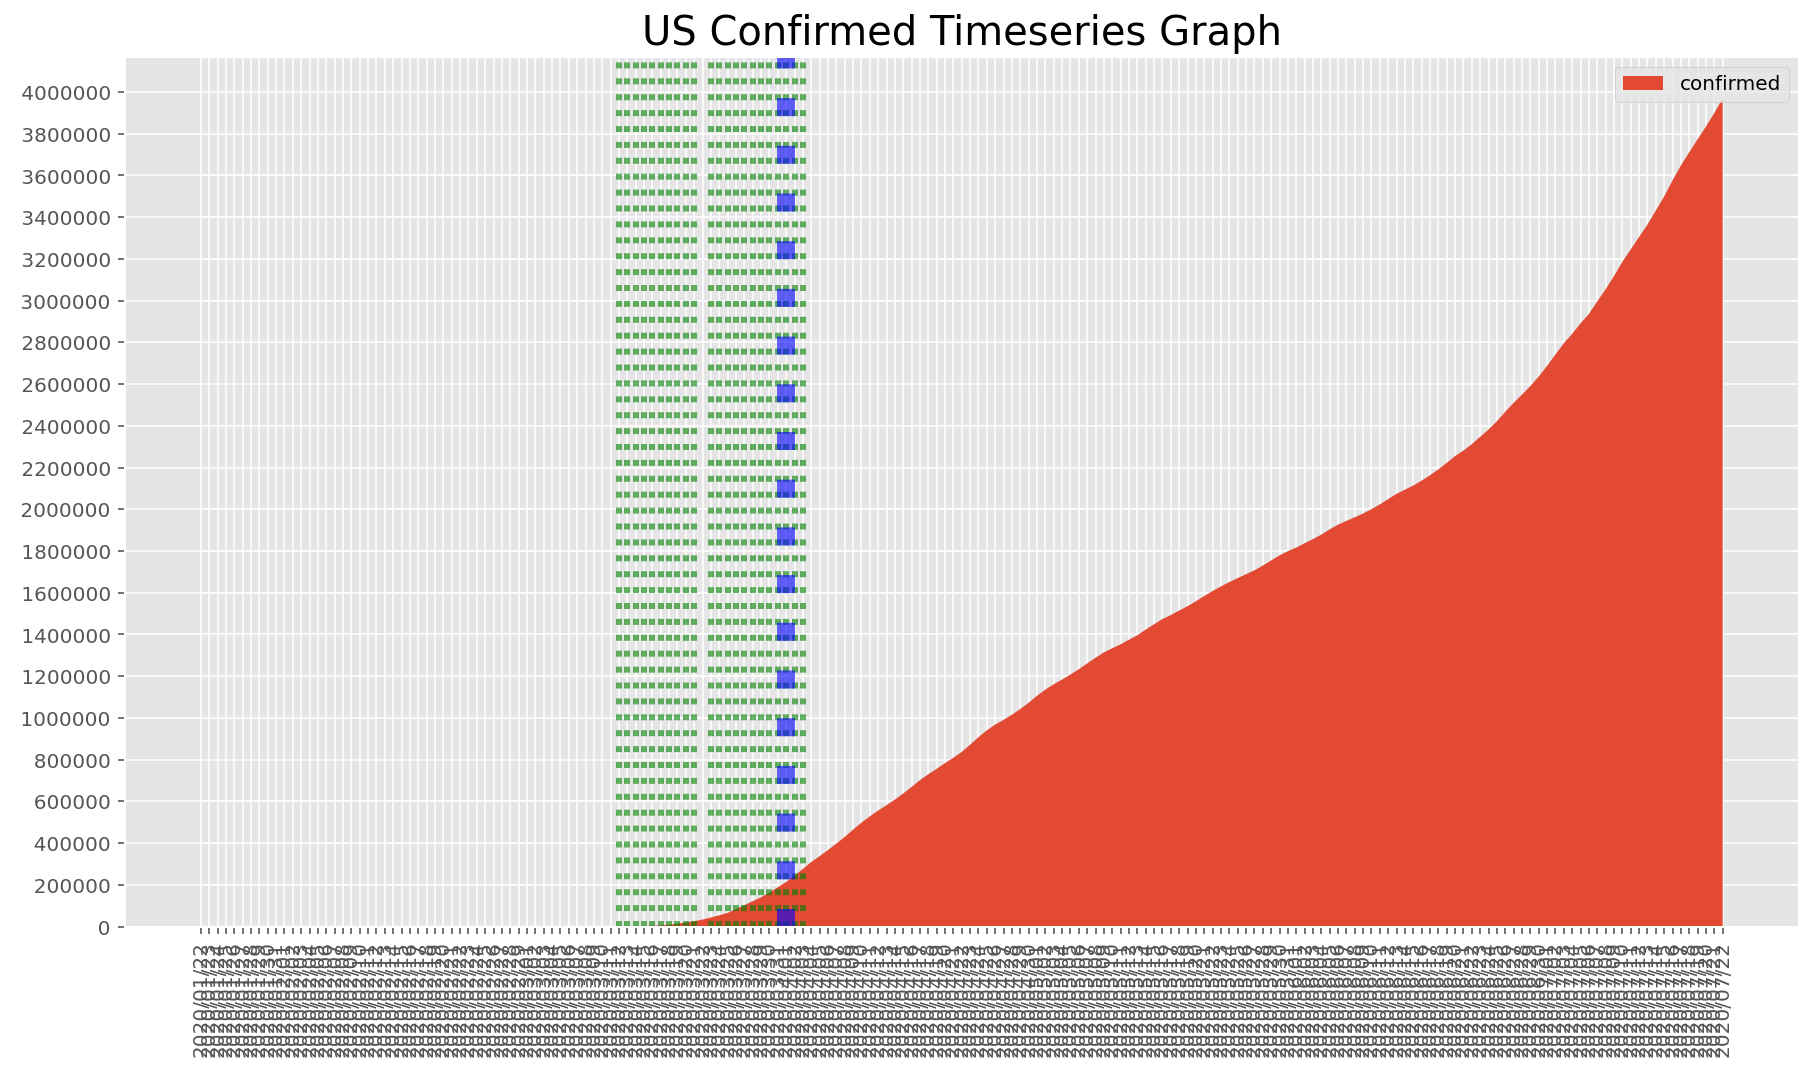

In [ ]:
Con_plot('US')

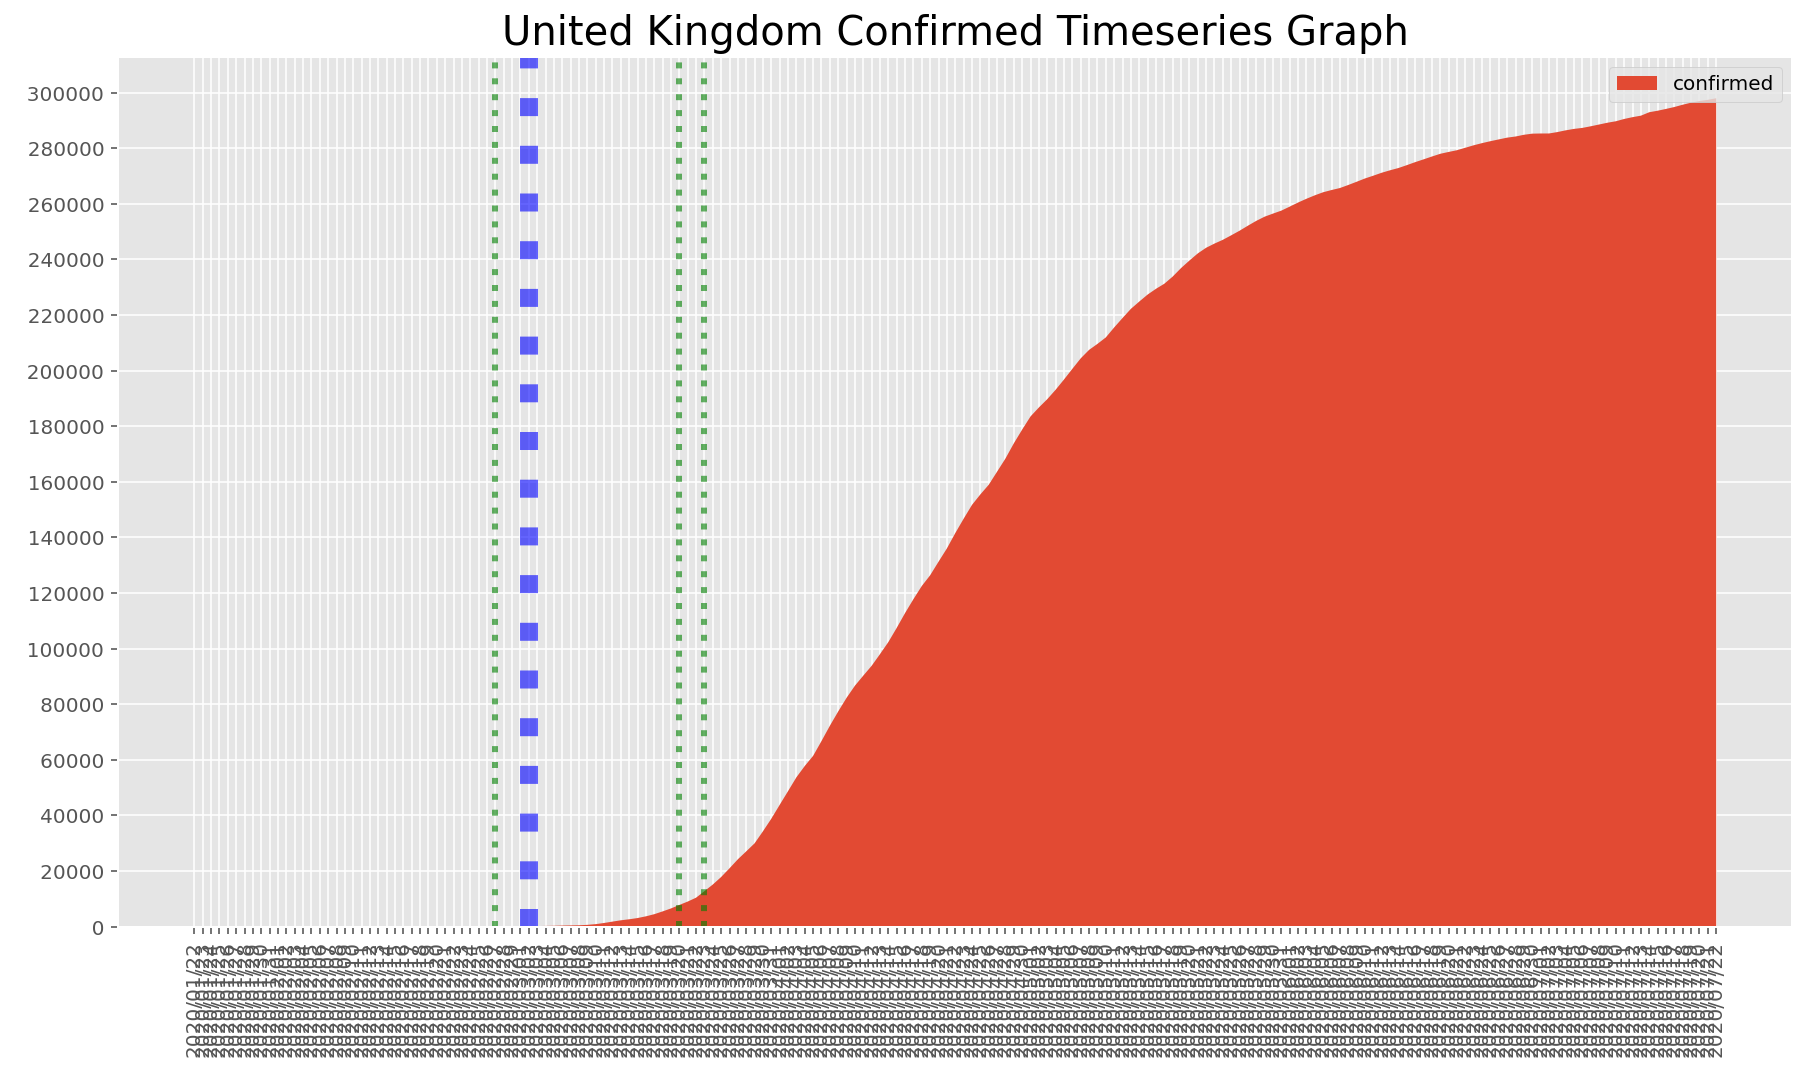

In [ ]:
Con_plot('United Kingdom')

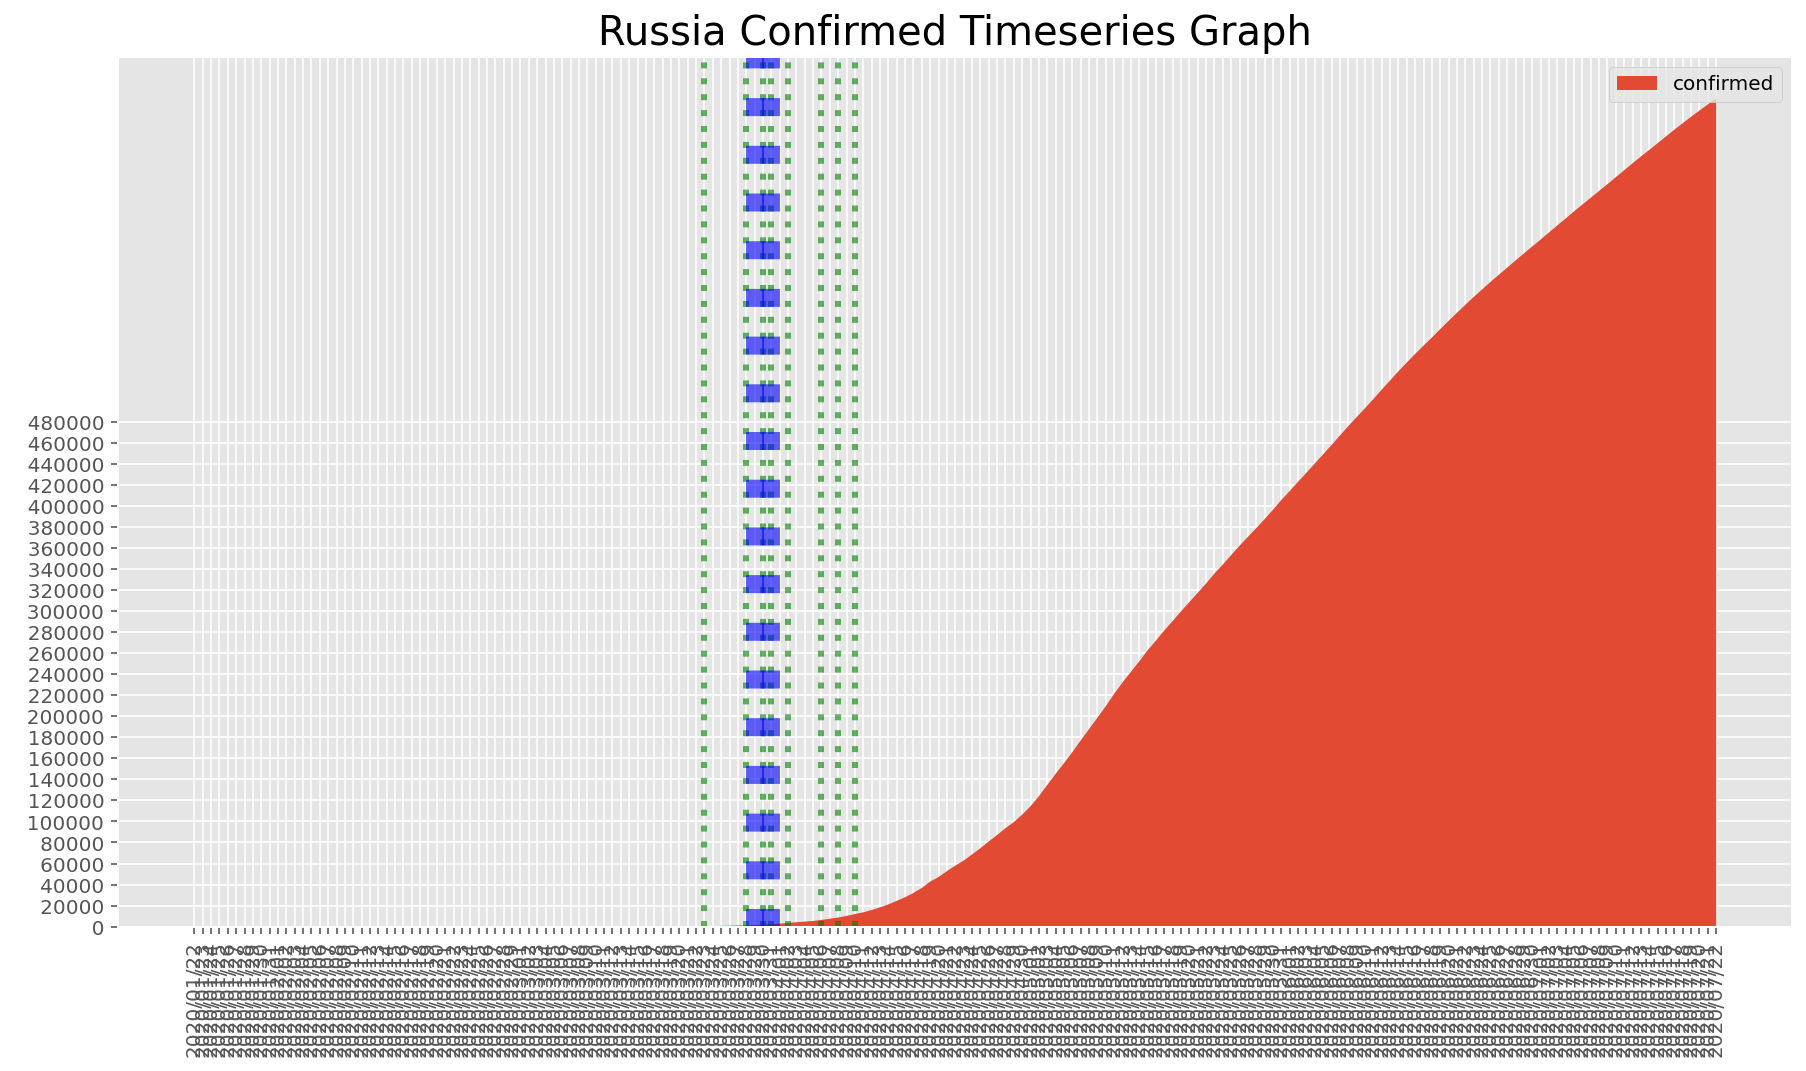

In [ ]:
Con_plot('Russia')

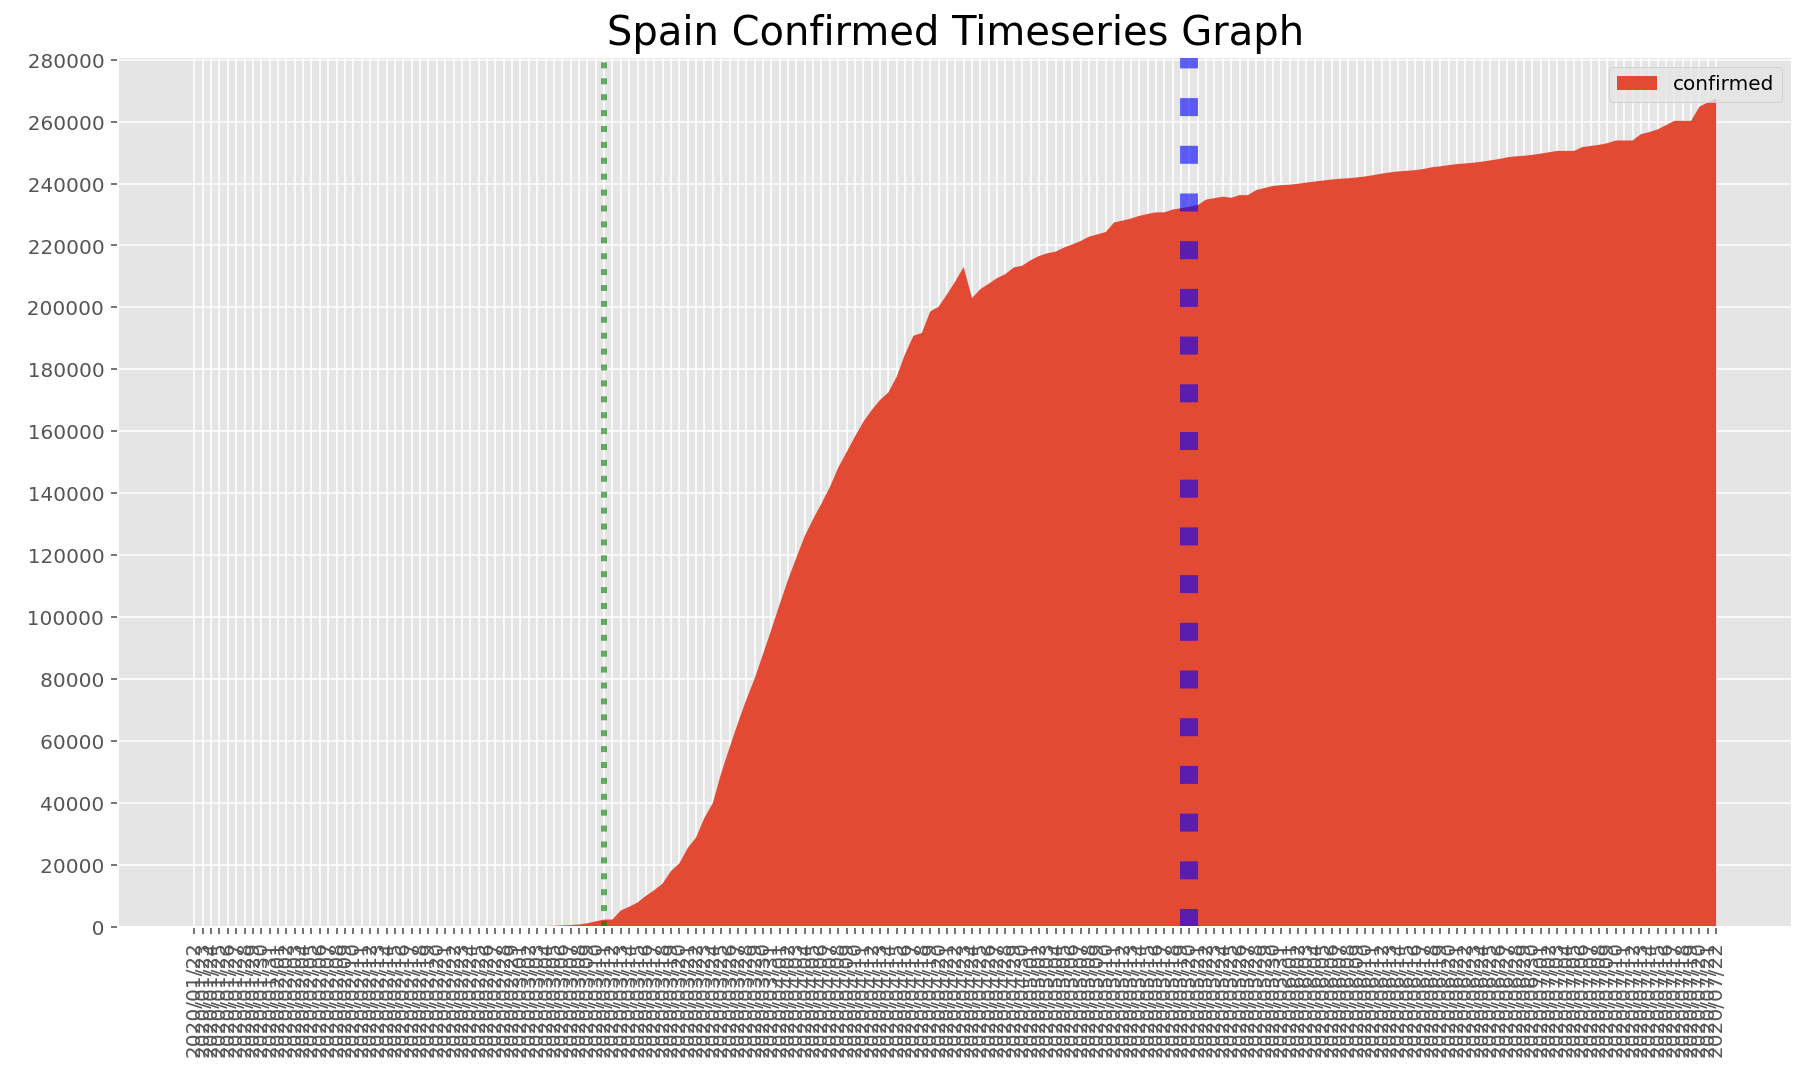

In [ ]:
Con_plot('Spain')

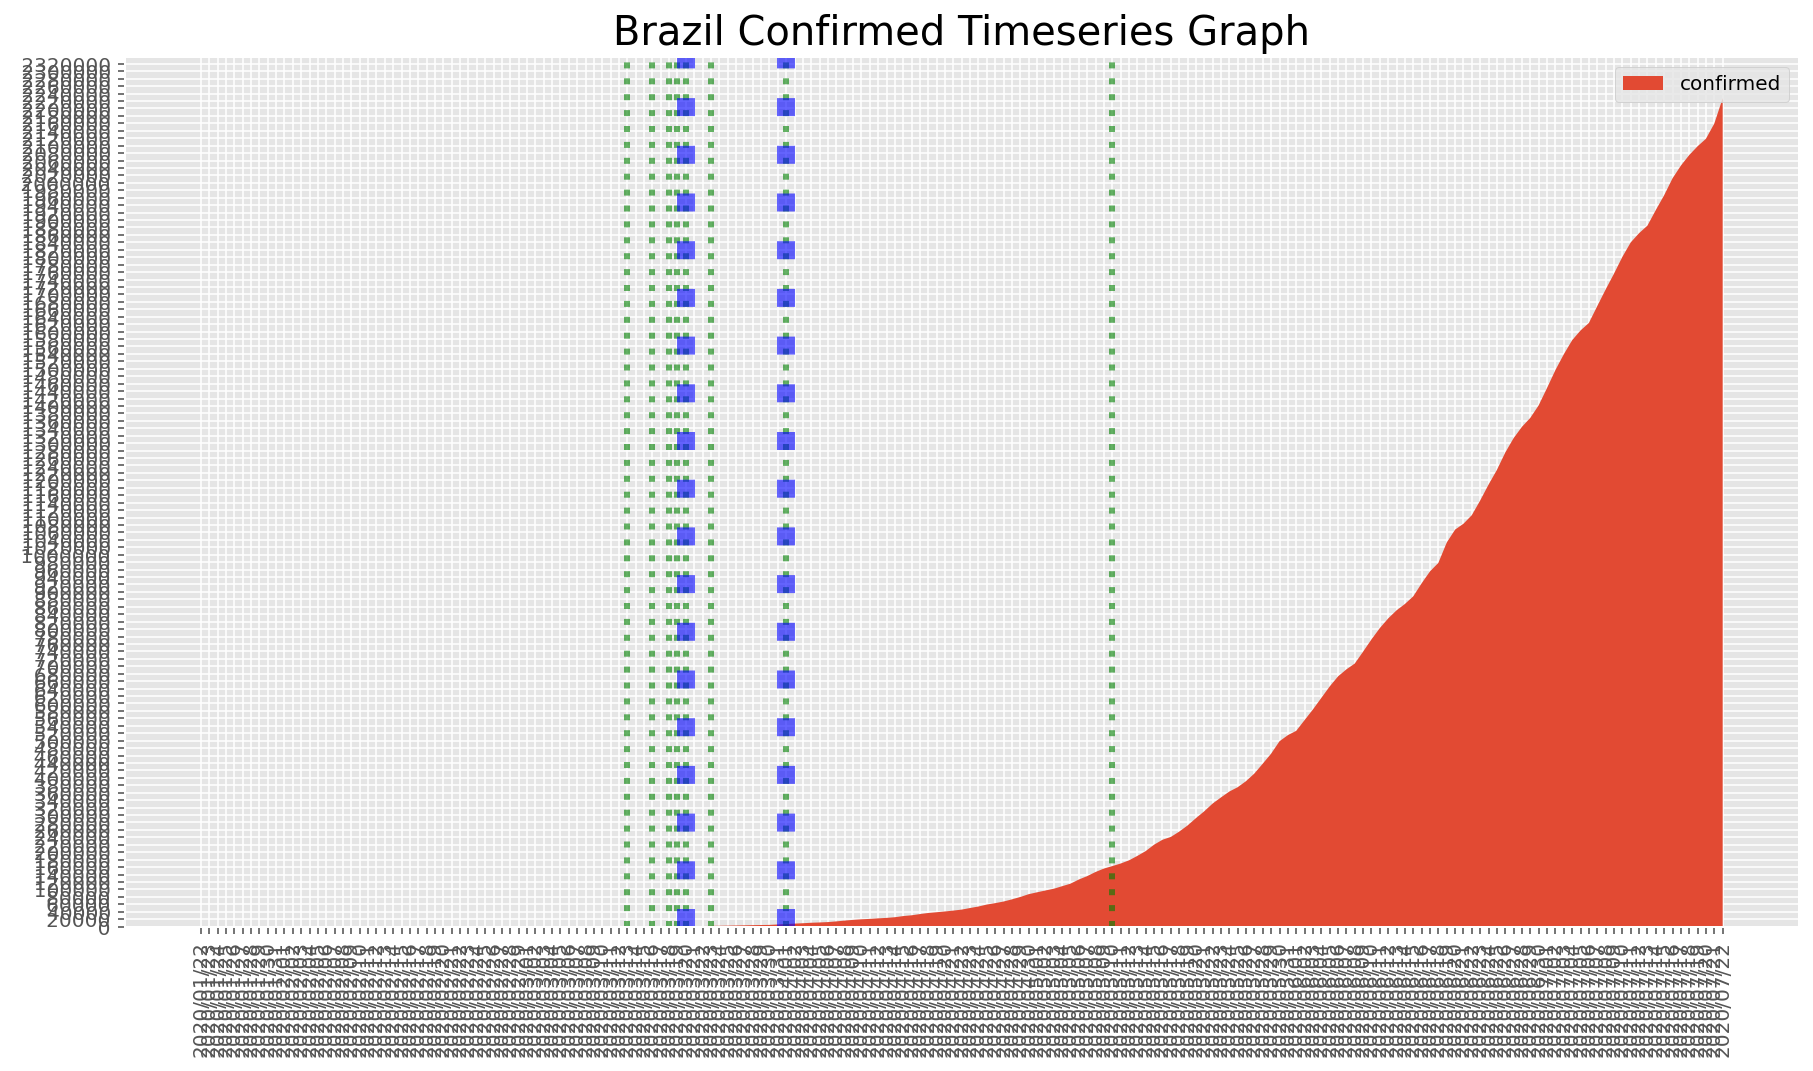

In [ ]:
Con_plot('Brazil')

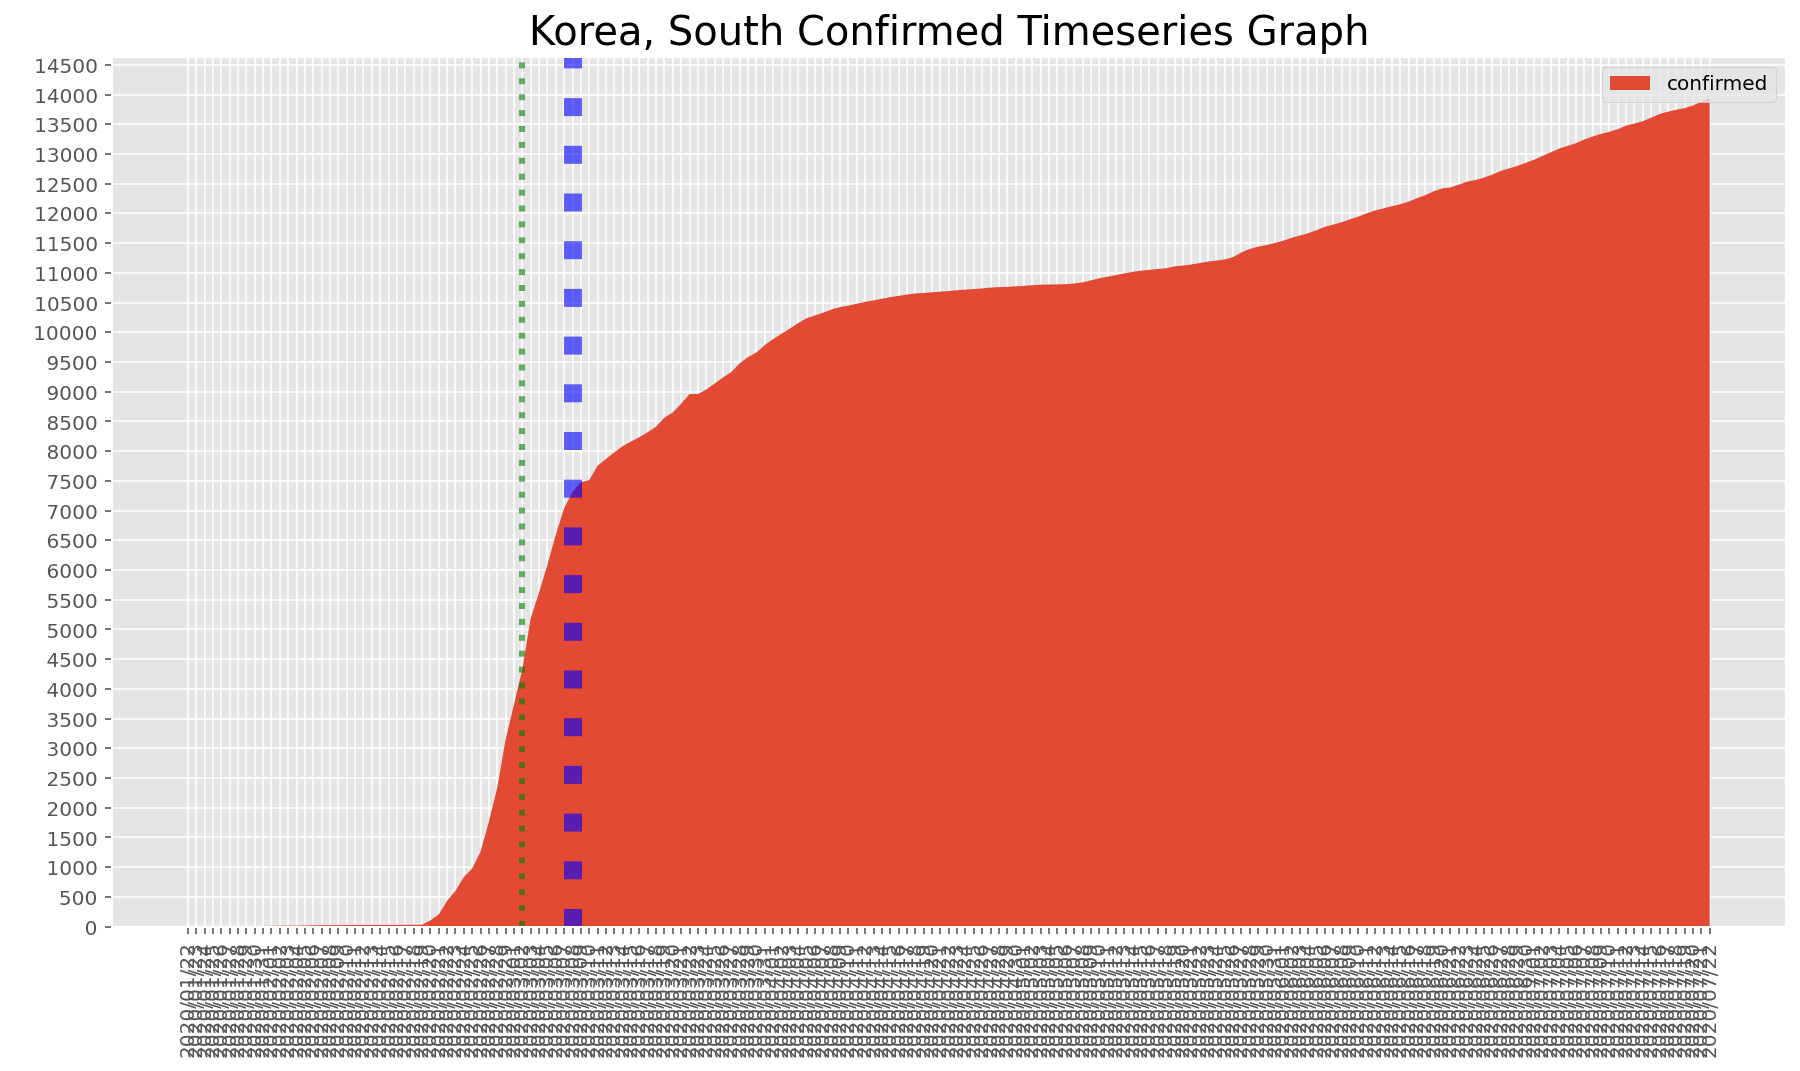

In [ ]:
Con_plot('Korea, South')